In [0]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Dense,GlobalAveragePooling2D, Flatten, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, History
from keras.models import load_model
from sklearn import metrics
import seaborn as sn
import pandas as pd
from gradcam_utils import *
from scipy.stats import gaussian_kde

# Seperate train and test data

In [0]:
data_path = []
data_num = []
for i in glob.glob('.\\sorted\\*\\'):
    label = int(i.split('\\')[2])
    age_set = []
    for j in glob.glob(i+'*.jpg'):
        age_set.append((label,j))
        data_num.append(label)
    data_path.append(age_set)

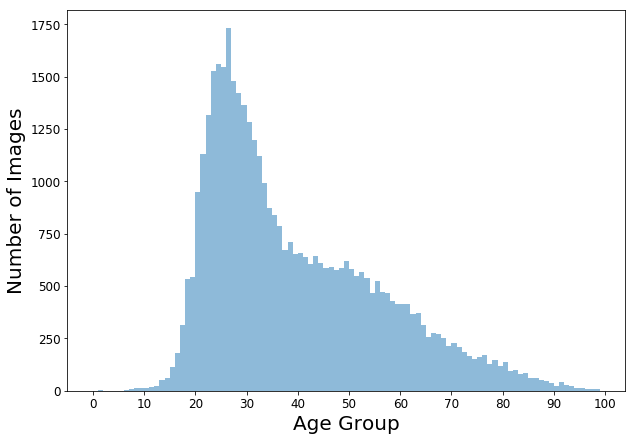

In [0]:
bins = np.arange(0, 100, 1)
plt.figure(figsize=(10,7))
plt.hist(data_num, bins=bins, alpha=0.5)
plt.xlabel('Age Group', size=20)
plt.ylabel('Number of Images', size=20)
plt.xticks(np.arange(0, 110, 10))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [0]:
def get_data_set(data_path, percentage):
    np.random.shuffle(data_path)
    num_data = len(data_path)
    thres = int(num_data * percentage)
    for i in range(0,thres):
        file_path = '.\\sorted\\train\\'+str(data_path[i][0])+'\\'
        try:
            os.makedirs(file_path)    
            print("Directory " , file_path ,  " Created ")
        except FileExistsError:
            print("Directory " , file_path ,  " already exists")  
        img = cv2.imread(data_path[i][1])
        if img.shape==(224,224):
            img = np.stack((img,)*3, axis=-1)
        cv2.imwrite(file_path + data_path[i][1].split('\\')[3],img)
    for i in range(thres,num_data):
        file_path = '.\\sorted\\test\\'+str(data_path[i][0])+'\\'
        try:
            os.makedirs(file_path)    
            print("Directory " , file_path ,  " Created ")
        except FileExistsError:
            print("Directory " , file_path ,  " already exists")  
        img = cv2.imread(data_path[i][1])
        if img.shape==(224,224):
            img = np.stack((img,)*3, axis=-1)
        cv2.imwrite(file_path + data_path[i][1].split('\\')[3],img)

In [0]:
for i in data_path:
    if len(i)>20:
        get_data_set(i, 0.7)

Directory  .\sorted\train\12\  Created 
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\train\12\  already exists
Directory  .\sorted\test\12\  Created 
Directory  .\sorted\test\12\  already exists
Directory  .\sorted\test\12\  already exists
Directory  .\sorted\test\12\  already exists
Directory  .\sorted\test\12\  already exists
Directory  .\sorted\test\12\  already exists
Directory  .\sorted\test\12\  already exists
Directo

Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory  .\sorted\test\15\  already exists
Directory 

Directory  .\sorted\test\16\  already exists
Directory  .\sorted\test\16\  already exists
Directory  .\sorted\test\16\  already exists
Directory  .\sorted\test\16\  already exists
Directory  .\sorted\test\16\  already exists
Directory  .\sorted\test\16\  already exists
Directory  .\sorted\test\16\  already exists
Directory  .\sorted\train\17\  Created 
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
D

Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  already exists
Directory  .\sorted\train\17\  alr

Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  alr

Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  already exists
Directory  .\sorted\train\18\  alr

Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory  .\sorted\test\18\  already exists
Directory 

Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  alr

Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  already exists
Directory  .\sorted\train\19\  alr

Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  alr

Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  alr

Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  alr

Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\train\20\  already exists
Directory  .\sorted\test\20\  Created 
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
D

Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory  .\sorted\test\20\  already exists
Directory 

Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  alr

Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  alr

Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  alr

Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  already exists
Directory  .\sorted\train\21\  alr

Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory 

Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\test\21\  already exists
Directory  .\sorted\train\22\  Created 
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Direc

Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  alr

Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  alr

Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  alr

Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  already exists
Directory  .\sorted\train\22\  alr

Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory 

Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory  .\sorted\test\22\  already exists
Directory 

Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  alr

Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  alr

Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  alr

Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  alr

Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  already exists
Directory  .\sorted\train\23\  alr

Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory 

Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory 

Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\test\23\  already exists
Directory  .\sorted\train\24\  Created 
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists

Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  alr

Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  alr

Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  alr

Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  alr

Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  already exists
Directory  .\sorted\train\24\  alr

Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory 

Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory  .\sorted\test\24\  already exists
Directory 

Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  alr

Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  alr

Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  alr

Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  alr

Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  already exists
Directory  .\sorted\train\25\  alr

Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory 

Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory 

Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\test\25\  already exists
Directory  .\sorted\train\26\  Created 
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists

Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  alr

Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  alr

Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  alr

Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  alr

Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  already exists
Directory  .\sorted\train\26\  alr

Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory 

Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory  .\sorted\test\26\  already exists
Directory 

Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  alr

Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  alr

Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  alr

Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  alr

Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  already exists
Directory  .\sorted\train\27\  alr

Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory 

Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory  .\sorted\test\27\  already exists
Directory 

Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  alr

Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  alr

Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  alr

Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  alr

Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  already exists
Directory  .\sorted\train\28\  alr

Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory 

Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory  .\sorted\test\28\  already exists
Directory 

Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  alr

Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  alr

Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  alr

Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  already exists
Directory  .\sorted\train\29\  alr

Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory 

Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory  .\sorted\test\29\  already exists
Directory 

Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  alr

Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  alr

Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  alr

Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  alr

Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\train\30\  already exists
Directory  .\sorted\test\30\  Created 
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .

Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory  .\sorted\test\30\  already exists
Directory 

Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  alr

Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  alr

Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  alr

Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  already exists
Directory  .\sorted\train\31\  alr

Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory 

Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory  .\sorted\test\31\  already exists
Directory 

Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  alr

Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  alr

Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  alr

Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\train\32\  already exists
Directory  .\sorted\test\32\  Created 
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Direct

Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory  .\sorted\test\32\  already exists
Directory 

Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  alr

Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  alr

Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  already exists
Directory  .\sorted\train\33\  alr

Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory 

Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory  .\sorted\test\33\  already exists
Directory 

Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  alr

Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  alr

Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  already exists
Directory  .\sorted\train\34\  alr

Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory  .\sorted\test\34\  already exists
Directory 

Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  alr

Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  alr

Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  already exists
Directory  .\sorted\train\35\  alr

Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory  .\sorted\test\35\  already exists
Directory 

Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  alr

Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  alr

Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  already exists
Directory  .\sorted\train\36\  alr

Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory  .\sorted\test\36\  already exists
Directory 

Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  alr

Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  already exists
Directory  .\sorted\train\37\  alr

Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory  .\sorted\test\37\  already exists
Directory 

Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  alr

Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  alr

Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  already exists
Directory  .\sorted\train\38\  alr

Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory  .\sorted\test\38\  already exists
Directory 

Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  alr

Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  already exists
Directory  .\sorted\train\39\  alr

Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory  .\sorted\test\39\  already exists
Directory 

Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  alr

Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  already exists
Directory  .\sorted\train\40\  alr

Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory  .\sorted\test\40\  already exists
Directory 

Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  alr

Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  alr

Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\train\41\  already exists
Directory  .\sorted\test\41\  Created 
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory 

Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\test\41\  already exists
Directory  .\sorted\train\42\  Created 
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Dire

Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  alr

Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  already exists
Directory  .\sorted\train\42\  alr

Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory  .\sorted\test\42\  already exists
Directory 

Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  alr

Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  already exists
Directory  .\sorted\train\43\  alr

Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory  .\sorted\test\43\  already exists
Directory 

Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  alr

Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  already exists
Directory  .\sorted\train\44\  alr

Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory  .\sorted\test\44\  already exists
Directory 

Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  alr

Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  already exists
Directory  .\sorted\train\45\  alr

Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory  .\sorted\test\45\  already exists
Directory 

Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  alr

Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  already exists
Directory  .\sorted\train\46\  alr

Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory  .\sorted\test\46\  already exists
Directory 

Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  alr

Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  already exists
Directory  .\sorted\train\47\  alr

Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory  .\sorted\test\47\  already exists
Directory 

Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  alr

Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  already exists
Directory  .\sorted\train\48\  alr

Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory  .\sorted\test\48\  already exists
Directory 

Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  alr

Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  already exists
Directory  .\sorted\train\49\  alr

Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory  .\sorted\test\49\  already exists
Directory 

Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  alr

Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\train\50\  already exists
Directory  .\sorted\test\50\  Created 
Directory  .\sorted\test\50\  already exists
Directory  .\sorted\test\50\  already exists
Directory  .\sorted\test\50\  already exists
Directory  .\sorted\test\50\  already exists
Directory  .\sorted\test\50\  already exists


Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  alr

Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  already exists
Directory  .\sorted\train\51\  alr

Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory  .\sorted\test\51\  already exists
Directory 

Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  alr

Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  already exists
Directory  .\sorted\train\52\  alr

Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory  .\sorted\test\52\  already exists
Directory 

Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  alr

Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  already exists
Directory  .\sorted\train\53\  alr

Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\test\53\  already exists
Directory  .\sorted\train\54\  Created 
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Dire

Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  already exists
Directory  .\sorted\train\54\  alr

Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory  .\sorted\test\54\  already exists
Directory 

Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  alr

Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  already exists
Directory  .\sorted\train\55\  alr

Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\test\55\  already exists
Directory  .\sorted\train\56\  Created 
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Director

Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  already exists
Directory  .\sorted\train\56\  alr

Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory  .\sorted\test\56\  already exists
Directory 

Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  alr

Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\train\57\  already exists
Directory  .\sorted\test\57\  Created 
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\sorted\test\57\  already exists
Directory  .\

Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  alr

Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  already exists
Directory  .\sorted\train\58\  alr

Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  alr

Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\train\59\  already exists
Directory  .\sorted\test\59\  Created 
Directory  .\sorted\test\59\  already exists
Directory  .\sorted\test\59\  already exists
Directory  .\sorted\test\59\  already exist

Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  alr

Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  already exists
Directory  .\sorted\train\60\  alr

Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  alr

Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  already exists
Directory  .\sorted\train\61\  alr

Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\test\61\  already exists
Directory  .\sorted\train\62\  Created 
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory

Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  already exists
Directory  .\sorted\train\62\  alr

Directory  .\sorted\test\62\  already exists
Directory  .\sorted\test\62\  already exists
Directory  .\sorted\test\62\  already exists
Directory  .\sorted\test\62\  already exists
Directory  .\sorted\train\63\  Created 
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exist

Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  already exists
Directory  .\sorted\train\63\  alr

Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  already exists
Directory  .\sorted\train\64\  alr

Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory  .\sorted\test\64\  already exists
Directory 

Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  already exists
Directory  .\sorted\train\65\  alr

Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  already exists
Directory  .\sorted\train\66\  alr

Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\test\66\  already exists
Directory  .\sorted\train\67\  Created 
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Direct

Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\train\67\  already exists
Directory  .\sorted\test\67\  Created 
Directory  .\sorted\test\67\  already exists
Directory  .\sorted\test\67\  already exists
Directory  .\sorted\test\67\  already exist

Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  already exists
Directory  .\sorted\train\68\  alr

Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  already exists
Directory  .\sorted\train\69\  alr

Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  already exists
Directory  .\sorted\train\70\  alr

Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  already exists
Directory  .\sorted\train\71\  alr

Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  already exists
Directory  .\sorted\train\72\  alr

Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  already exists
Directory  .\sorted\train\73\  alr

Directory  .\sorted\train\74\  already exists
Directory  .\sorted\train\74\  already exists
Directory  .\sorted\train\74\  already exists
Directory  .\sorted\test\74\  Created 
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\sorted\test\74\  already exists
Directory  .\

Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory  .\sorted\test\75\  already exists
Directory 

Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\test\76\  already exists
Directory  .\sorted\train\77\  Created 
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Directory  .\sorted\train\77\  already exists
Dire

Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\train\78\  already exists
Directory  .\sorted\test\78\  Crea

Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  already exists
Directory  .\sorted\train\80\  alr

Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  already exists
Directory  .\sorted\train\82\  alr

Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  already exists
Directory  .\sorted\train\84\  alr

Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  already exists
Directory  .\sorted\train\87\  alr

Directory  .\sorted\train\92\  already exists
Directory  .\sorted\train\92\  already exists
Directory  .\sorted\test\92\  Created 
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\test\92\  already exists
Directory  .\sorted\train\93\  Created 
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory  .\sorted\train\93\  already exists
Directory

In [0]:
DATASET_ROOT = '.\\sorted\\train\\'
values = list(range(0,100))
Classes = [str(i) for i in values]
train_datagen = ImageDataGenerator(samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   vertical_flip=True)
train_generator = train_datagen.flow_from_directory(DATASET_ROOT,
                                                    class_mode='sparse',
                                                    interpolation='bilinear',
                                                    target_size=(224, 224),
                                                    batch_size=16,
                                                    shuffle=True,
                                                    classes = Classes)

Found 29206 images belonging to 100 classes.


In [0]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224,224,3), pooling=None)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model = Sequential()
for i in range(0,18):
    model.add(vgg16.layers[i])
for layer in model.layers:
    layer.trainable = False
model.add(GlobalAveragePooling2D())
"""
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
"""
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model.compile(loss='mean_absolute_error',
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9),
              metrics=[keras.metrics.mae])

In [0]:
filepath="new-weights-improvement-{epoch:02d}-{mean_absolute_error:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, History()]
model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n // 16,
                    nb_epoch=100, 
                    verbose=1,
                    callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., steps_per_epoch=1825, verbose=1, callbacks=[<keras.ca..., epochs=100)`
  


Epoch 1/100
1825/1825 [==============================] - 395s 216ms/step - loss: 14.2502 - mean_absolute_error: 14.2502

Epoch 00001: mean_absolute_error improved from inf to 14.25132, saving model to new-weights-improvement-01-14.25.hdf5
Epoch 2/100
1825/1825 [==============================] - 368s 201ms/step - loss: 12.6278 - mean_absolute_error: 12.6278 5:48 - loss: 13.0745 - mean_a - ETA: 5:43 - loss: 12.8551 - mean_absolute_error:  - ETA: 5:42 - loss: 12.710 - ETA: 5:36 - loss: 12.5750 - mean_ab - ETA: 5:32 - loss: 1 - ETA: 4:50 - loss: 12.7965 - mean_absolute_error: 1 - ETA: 4:49 - loss: 1 - ETA: 4:41 - loss: 12.7402 - mean_abso - ETA: 4:37 - loss: 12.7681 - mean_absolute - ETA: 4:34 - loss: 12.7464 - mean - ETA: 4:30 - loss: 12 - ETA: 4:22 - loss: 12.7905 -  - ETA: 4:05 - loss: 12.8003 - mean_abso - ETA: 4:01 - loss: 12.7741 - mean_abs - ETA: 3:57 - loss: 12.7449 - me - ETA: 3 - ETA: 3:30 - loss: 12.7264 - mean_absolute_error - ETA: 3:28 - loss: 12.7361 - mean_absolute_error:  -

1825/1825 [==============================] - 367s 201ms/step - loss: 10.8363 - mean_absolute_error: 10.8363 6:07 - loss: 10.7992 - mean_absolute_error: 10 - ETA: 6:04 - loss: 10.8706 - mean_absolute_ - ETA: - ETA: 5:47 - loss: 10.9626 - mean_abso - ETA: 5:32 - lo - ETA: 5:23 - loss: 10.7954 - mean_absolute_error: 10.7 - ETA: 5:22 - loss: 10.7967 - mean_absolu - ETA: 5 - ETA: 4:57 - los - ETA: 4:49 - ETA: 3:40 - ETA: 3:31 - loss: 10.8531 - mean - ETA: 3:26 - loss: 10.8376 - mean - ETA: 3:21 - l - ETA: 3:12 - loss: 10.8509 - mean_absolute_error: 10. - ETA: 3:11 - loss: 10.8568 - mean_absolute_error - ETA: 3:10 - loss: 10.8557 - mean_absolute_error: 10.855 - ETA: 3:09 - loss: 10.8556 - mean_absolute_error: 10.8 - ETA: 3:09 - loss: 10.8569 - mean_absolute - ETA: 3:06 - loss: 10.8593 - mean_absolut - ETA: 3:03 - loss: 10.8486 - mean - ETA: 2:58 - loss: 10.8422 - mean_absolute_error: 10.8 - ETA: 2:57 - loss: 10.8370 - mean_absolute_error:  - ETA: 2:44 - loss: 10.8209 - mean_absolute_erro - E

1825/1825 [==============================] - 369s 202ms/step - loss: 10.4781 - mean_absolute_error: 10.4781 6:06 - loss: 10.2916 - mean_absolute_err - ETA: 6:08 - loss: 11.0468 - mean_absolute_error - ETA: 6:03 - loss: 1 - ETA: 5:54 - loss: 10.7376 - mean_absolute_err - ETA:  - ETA: 5:30 - loss: 10.7246 - mean_absolute_error: 10.7 - ETA: 5:30 - loss: 10.7494 - mean_ - ETA: 5:25 - loss: 10.6999 - mean_absolute - ETA: 5 - ETA: 5:11 - loss: 10.5738 - mean_absolute_error: 1 - ETA: 5:10 - loss: 10.5640 - mean_absolute_error: - ETA: 5:08 - loss: 10.5326 - mean_absolut - ETA: 5:05 - loss: 10.5322 - mean_absolute_error:  - ETA: 5:03 - loss: 1 - ETA: 4:44 - loss: 10.4761 - mean - ETA: 4:28 - loss: 10.4576 - mean_absolute_error - ETA: 4:26 - loss: 10.4620 - mean_absolute_error: 10.46 - ETA: 4:25 - loss: 10.4625 - mean_absolute_error: 10.462 - ETA: 4:25 - loss:  - ETA: 4:05 - loss: 10.4301 - mean_absolute_error: 10.43 - ETA: 4:05 - loss: 10.4316 - mean_absolute_error: - ETA: 4: - ETA: 3:54 - loss

1825/1825 [==============================] - 368s 202ms/step - loss: 10.2473 - mean_absolute_error: 10.2473 6:03 - loss: 11.0557 - ETA: 6:10 -  - ETA: 5:57 - loss: 10.2379 - mean_absolute_err - ETA: 5:54 - loss: 10.2331 -  - ETA: 5:47 - lo - ETA: 5:13 - loss: 10.3394 - mean_absolute_error: 10.33 - ETA: 5:12 - loss: 10.3395 - mean_abso - ETA: 4:33 - loss: 10.2731 - mean_absolute_error: 10.273 - ETA: 4:32 - loss: 10.2851 - mean_absolu - ETA: 4:29 - loss: 10.2624 - mean_ - ETA: 4:12 - loss: 10.1972 - mean_absolute_error: 1 - ETA: 4:11 - loss: 10.1982 - mean_absolute_error: 10.1 - ETA: 4: - ETA: 4:01 - loss: 10.2311 - mean_absolute_error: 1 - ETA: 3:59 - loss: 10.2298 - mean_absolute_erro - ETA: 3:57 - loss: 1 - ETA: 3:14 - loss: 10.2715 - mean_absol - ETA: 3:10 - loss: 10.2559 - mean_absolute - ETA: 3:07 - loss: 10.2412 - mean_absolute_error: 10.241 - ETA: 3:07 - loss: 10.2395 - mean - ETA: 3:02 - loss: 10.2329 - mean_a - ETA: 2:58 - loss: 10.2261 - mean_absolut - ET - ETA: 2:32 - loss: -

1825/1825 [==============================] - 368s 201ms/step - loss: 10.1258 - mean_absolute_error: 10.1258 6:06 - loss: 10.2940 - mean_absolute_error:  - ETA: 6:03 - loss: 10.1849 - mean_absolute_err - ETA: 6:03  - ETA: 5:53 - loss: 10.0889 - mean_absolute_error - ETA: 5:50 - loss: 10.1184 - mean_absolute_er - ETA: 5:48 - loss: 10.1422 - mean_absolute_error: 10.1 - ETA: 5:47 - loss: 10.1385 - mean_absolute_error: - ETA: 5:45 -  - ETA - ETA: 5:12 - - ETA: 4:51 - loss: 10.1139 - mean_absolute_error: 1 - ETA: 4:50 - - ETA: 4:29 - loss: 10.1904 - mean_absolute_error: 10.19 - ETA: 4:28 - loss: 10.1897 - mean_absolute_erro - ETA: 4:26 - loss: 10.1801 - mean_absolute_err - ETA: 4:24 - loss: 10.1696 - mean_absolu - ETA: 4:20 - loss: 10.1540 - mean_absolute_e - ETA: 4:18 - loss: 10.1495 - me - ETA: 4:13 - loss: 10.1340 - mean_absolute_error: 10.134 - ETA: 4:12 - loss: 10.136 - ET - ETA: 3:31 - loss: 10.1 - ETA: 3:00 - loss: 10.0771 - mean_ab - ETA: 2:56 - loss: 10.0867 - mean_absolute_error: 1

1825/1825 [==============================] - 368s 202ms/step - loss: 10.0214 - mean_absolute_error: 10.0214:01 - loss: 9.8566 - mean_absolute_error:  - ETA: 5:59 - loss: 9.7954 - mean_absolute_e - ETA: 5:55 - loss: 9.7680 - mean_absolute_error:  - ETA: 5:54 - loss: 9.8446 - mean_absolut - ETA: 5:51 - loss: 9.8788  - ETA: 5:44 - loss: 9.9499 - mean_absolute_error: - ETA: 5:43 - loss: 9.9418 - mean_absolute_error: 9.94 - ETA: 5:43 - loss: 9.9362 - mean_absolute_error: 9.9 - ETA: 5:42 - loss - - ETA: 5:23 - los - ETA: 4:40 - loss: 9.8486 - mean_absolute - ETA: 4:37 - loss: 9.8670 - mean_absolute_error: 9.867 - ETA: 4:37 - loss: 9.8651 -  - ETA: 4:31 - loss: 9.8945 - mean_absolu - ETA: 4:28 - loss: 9.8996 - mean_abs - ETA: 4:24 - loss: 9.9587 - mean_absolute_erro - ETA: 4:23 - loss: 9. - ETA: 4:16 - loss: 9.9964 - mean_absolute_error:  - ETA: 4:14 - loss: 9.9948 - mean_ - ETA: 4:10 - loss: 9.9786 - mean_absolut - ETA: 4:07 - loss: 9.9617 - mean_absolute - ETA: 4:04 - loss: 9 - ETA: 3:57 - 

1825/1825 [==============================] - 370s 203ms/step - loss: 9.9549 - mean_absolute_error: 9.9549A: 6:00 - loss: 9.9 - ETA: 5: - ETA: 5:46 - loss: 9.9175 - mean_abs - ETA: 5:42 - loss: 9.8601 - mean_abs - ETA: 5:37 - loss: 9.8591 - mean_absolute - ETA: 5:23 - loss: 9.9750 - me - ETA: 5:18 - loss: 9.9660 - mean_absolute_err - ETA: 5:16 - loss: 9.9745  - ETA: 4:59 - loss: 9.9658 - mean_absolu - ETA: 4:55 - l - ETA: 4:47 - loss: 9.9771 - mean_absolute_er - ETA: 4:45 - ETA: 4:35 - loss: 10.0406 - mean_absolute - ETA: 4:33 - loss: 10.0517 - mean_absolute_error: 10.05 - ETA: 4:32 - loss: 10.0602 - mean_ab - ETA: 4:28 - loss: 10.0245 - mean_absolute_er - ETA: 4:25 - loss: 10.0154 - mean_absolute_error: 10. - ETA: 4:25 - loss: 10.0011 - mean_absolute_error: 10.001 - ETA: 4:24 - loss: 10.0039 - mean - ETA: 4:20 - loss: 9 - ETA: 4:12 - loss: 9.9810 - ETA: 3:44 - loss: 10.0296 - mea - ETA: 3:38 - loss: 10.0167 - mean - ETA: 3:10 - loss: 10.0263 - ETA: 3:03 - loss:  - ETA: 2:56 - loss: 10.

1825/1825 [==============================] - 369s 202ms/step - loss: 9.9038 - mean_absolute_error: 9.9038A: 6:12 - loss: 11.3033 - mean_absolu - ETA: 6:03 - loss: 10.00 - ETA: 5: - ETA: 5:52 - loss: 10.1471 - mean_absolute_error: 10.14 - ETA: 5:51 - loss: 10.1544 -  - ETA: 5:45 - loss: 10.0201 -  - ETA: 5:38 - loss: 10.0382 - mean_absolute_error: 10.03 - ETA: 5:38 - loss: 9.9918 - mean_absolute_error: 9.9918  - ETA: 5:38 - loss: 9.9831 - ETA: 5:31 - loss: 9.9151 - mean_ab - ETA: 5:27 - loss: 9.9274 - mean_absolu - ETA: 5:24 - loss: 9.9363 - mean_absolute_error: - ETA: 5:23 - loss: 9.9332 - mean_absolute_error: 9 - ETA: 5:21 - loss: 9.9220 - mean_absolute_error: - E - ETA: 5:09 - loss: 9.9206 - mean_absolute_erro - ETA: 5:07 - loss: 9.9277 - mean_absolute_err - ETA: 5:05 - loss: 9.9218 - mean_absol - ETA: 5:01 - loss: 9.8845 - ETA: 4:55 - loss: 9.9067 - mean_absolute_error:  - ETA: 4:54 - loss: 9.8789 - mean_absol - ETA: 4:50 - loss: 9.9022 - mean_absolute_error:  - ETA: 4:49 - loss: 9.

1825/1825 [==============================] - 368s 201ms/step - loss: 9.9651 - mean_absolute_error: 9.9651A: 6:04 - loss: 10.5177 - mean_absolute_error: 10.51 - ETA: 6:04 - loss: 10.2749 - mean_absolute_error: 10. - ETA: 6:04 - loss: 10.0825 - mean_absolute_er - ETA: 6:01 - loss: 9.8356 - mean_absolute_error - ETA: 6:00 - loss: 9.7174 - mean_abso - ETA: 5:57 - loss: 9.7794 - mean_absolute_error: 9.779 - ETA: 5:57 - loss: 9.7568 - mean_absolute_error: 9.756 - ETA: 5:57 - loss: 9.8178 - mean_absolute_error:  - ETA: 5:55 - loss: 9.8200 - mean_absolute_error: 9.82 - ETA: 5:55 - loss:  - ETA: 5:50 - loss: 10.1231 - mean_absolute_error: - ETA: 5:48 - loss: 10.0709 - mean_absol - ETA: 5:45 - lo - ETA: 5:36 - loss: 9.9508 - mean_absolute_error: 9.95 - ET - ETA: 5:24 - loss: 10.0 - ETA: 5:17 - ETA: 5:07 - loss: 10.0692 - mean_absolut - ETA: 4:52 - loss: 10.1101  - ETA: 4:46 - loss: 10.1017 - mean_abs - ETA: 4:42 - loss: 10.0660 - mean_absolute_error: 10.0 - ETA: 4:41 - loss: - ETA: 4:10 - loss: 

1825/1825 [==============================] - 369s 202ms/step - loss: 9.9046 - mean_absolute_error: 9.9046A: 6:00 - loss: 10.4206 - mean_absolute_error:  - ETA: 5:58 - loss: 10.0190 - mean - ETA: 6:00 - loss: 9.8106 - mean_absolute_error: 9. - ETA: 6:00 - loss: 10.0391 - mean_absolute_err - ETA: 5:57 - loss: 10.0397 - mean_absolute_error: 10.0 - ETA: 5:55 - loss: 10.066 - ETA: 5:51 - loss: 10.1199 - mean_absolute_error: 10. - ETA: 5:51 - loss: 10.1585 - mean_absolute_error - ETA: 5:48 - loss: 10.2200 - mean_absolute_error: 10.2 - ETA: 5:48 - loss: 10.1906 - mean_absolute - ETA: 5:46 - loss: 10.2458 - mean_absolute_error:  - ETA: 5:44 - loss: 10.1894 - mean_absolute_er - ETA: 5:41 - loss: 10.1914 - mean_absolute_error: 10.1 - ETA: 5:41 - loss: 10.2023 - mean_absolute_e - ETA: 5:38 - loss: 10.1886 - me - ETA: 5:33 - loss: 10.1312 - mean_absolute_ - ETA: 5:30 - loss: 10.0726 - mean_absolute_err - ETA: 5:2 - ETA: 5:18 - loss: 9.9769 - mean_absolute_error: 9 - ETA: 5:17 - loss: 9.9835 - mean

1825/1825 [==============================] - 366s 200ms/step - loss: 9.8870 - mean_absolute_error: 9.8870 6:09 - loss: 9.3091 - mean_absolute_error: 9 - ETA: 6:06 - loss: 9.2363 - mean_absolute_error: - ETA: 6:04 - loss: 9.5530 - mean_absolute_error: 9.5 - ETA: 6:03 - loss: 9.2886 - mean_absolu - ETA: 5:58 - loss: 9.6850 - mean_absolute_e - ETA: 5:56 - loss: 9.8756 - me - ETA: 5:52 - loss: 9.9348 - mean_absolute_error: 9.93 - ETA: 5:52 - loss: 9.8989 - mean_absolute_error: 9.898 - ETA: 5:51 - loss: 9.9102 - mean_absolute_er - ETA: 5:49 - loss: 9.8668 - mean_absolute - ETA: 5:46 - loss: 9.8655 - mean_absolu - ETA: 5:42 - loss: 9.9464 - mean_absolute_error: 9 - ETA: 5:40 - loss: 9.9680 - mean_ - ETA: 5:36 - loss: 10.0523 - mean - ETA: 5:31 - loss: 10.0061 - mean_absolute_error: 1 - ETA: 5:30 - loss: 9.9836 - mean_absolute_error: 9.9 - ETA: 5 - ETA: 5:19 - loss: - ETA: 4:49 - l - ETA: 4:18 - loss: 9.9265 - mean_absolute_erro - ETA - ETA: 3:43 - loss:  - - ETA: 3:24 - loss: 9.9154  - ETA: 

1825/1825 [==============================] - 381s 209ms/step - loss: 9.8977 - mean_absolute_error: 9.8977

Epoch 00099: mean_absolute_error did not improve from 9.85223
Epoch 100/100
1825/1825 [==============================] - 374s 205ms/step - loss: 9.8076 - mean_absolute_error: 9.8076 5:42 - loss: 9.6369 - mean_absolute_ - ETA: 5:39  - ETA: 5:30 - loss: 9.6412 - mean_absolut - ETA: 5:27 - loss: 9.6451 - mean_absolute_error:  - ETA: 5:26 - loss: 9.6705 - me - ETA: 5:09 - loss: 9.6852 - mean_absolute_error - ETA: 5:07 - loss: 9.6772 - - ETA: 5:01 - loss: 9.7177 - m - ETA: 4:56 - loss: 9.7591 - mean_absolute_error: 9. - ETA: 4:55 - loss: 9.7755 - m - ETA: 4:50 - loss: 9.7881 - mean_absolute_ - ETA: 4:48 - loss: 9.7827 - mean_absolute_erro - ETA: 4:46 - loss: 9.7601  - ETA: 4:40 - loss: 9.7751 - me - ETA: 4:35 - loss - ETA: 4:27 - loss: 9.7743 - mean_absolute_erro - ETA:  - ETA: 3:52 - loss: 9.7509 - mean_absolute_er - ETA: 3:50 -  - ETA: 3:30 - loss: 9.7805 - mean_absolute_er - ETA - E

In [0]:
filepath="new-weights-improvement-{epoch:02d}-{mean_absolute_error:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, History()]
model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n // 16,
                    nb_epoch=10, 
                    verbose=1,
                    callbacks=callbacks_list)

C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., steps_per_epoch=1825, verbose=1, callbacks=[<keras.ca..., epochs=10)`
  


Epoch 1/10
1825/1825 [==============================] - 373s 204ms/step - loss: 9.8640 - mean_absolute_error: 9.8640s 

Epoch 00001: mean_absolute_error improved from inf to 9.86315, saving model to new-weights-improvement-01-9.86.hdf5
Epoch 2/10
1825/1825 [==============================] - 379s 207ms/step - loss: 9.8824 - mean_absolute_error: 9.8824A: 5:57 - loss: 10.0557 - mean_absolute_error: 10.055 - ETA: 5:56 - loss: 10.0427 - mean_abs - ET - ETA: 5:41 - loss: 10.0954 - mean_absolute_error: 10. - ETA:  - ETA: 2:37 - loss: 9. - ETA: 2:30 - loss: 9.9 - ETA: 2:22 - loss: 9.9442 - mean_absolu - ETA: 10s - loss: - ETA: 3s - loss: 9.8857 - mean_abs

Epoch 00002: mean_absolute_error did not improve from 9.86315
Epoch 3/10
1825/1825 [==============================] - 374s 205ms/step - loss: 9.8966 - mean_absolute_error: 9.8966A: 6:05 - los - ETA: 5:57 - loss: 9.6581 - - ETA:  - ETA: 5:29 - loss: 9.7297 - mea - ETA: 5:24 - loss: 9. - ETA: 5:17 - loss: 9.7424 - ETA: 5:11 - loss: 9.8008 - me

KeyboardInterrupt: 

# Continue from the broken kernel

In [0]:
filepath="weights-improvement-{epoch:02d}-{mean_absolute_error:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, History()]
model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n // 16,
                    nb_epoch=100, 
                    verbose=1,
                    callbacks=callbacks_list)

C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., steps_per_epoch=1832, verbose=1, callbacks=[<keras.ca..., epochs=100)`
  


Epoch 1/100
1832/1832 [==============================] - 396s 216ms/step - loss: 16.6835 - mean_absolute_error: 16.6835

Epoch 00001: mean_absolute_error improved from inf to 16.68364, saving model to weights-improvement-01-16.68.hdf5
Epoch 2/100
1832/1832 [==============================] - 396s 216ms/step - loss: 13.2346 - mean_absolute_error: 13.2346

Epoch 00002: mean_absolute_error improved from 16.68364 to 13.23465, saving model to weights-improvement-02-13.23.hdf5
Epoch 3/100
1832/1832 [==============================] - 400s 218ms/step - loss: 12.9781 - mean_absolute_error: 12.9781

Epoch 00003: mean_absolute_error improved from 13.23465 to 12.97808, saving model to weights-improvement-03-12.98.hdf5
Epoch 4/100
1832/1832 [==============================] - 391s 214ms/step - loss: 12.7321 - mean_absolute_error: 12.7321

Epoch 00004: mean_absolute_error improved from 12.97808 to 12.73224, saving model to weights-improvement-04-12.73.hdf5
Epoch 5/100
1832/1832 [======================

In [0]:
model.load_weights('weights-improvement-40-11.16.hdf5', by_name=False)

In [0]:
filepath="weights-improvement-{epoch:02d}-{mean_absolute_error:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, History()]
model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n // 16,
                    nb_epoch=100, 
                    verbose=1,
                    callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., steps_per_epoch=1832, verbose=1, callbacks=[<keras.ca..., epochs=100)`
  


Epoch 1/100
1832/1832 [==============================] - 389s 212ms/step - loss: 11.1672 - mean_absolute_error: 11.1672s - loss: 11.1693 - mean_absolute_error: 1

Epoch 00001: mean_absolute_error improved from inf to 11.16696, saving model to weights-improvement-01-11.17.hdf5
Epoch 2/100
1832/1832 [==============================] - 371s 203ms/step - loss: 11.1399 - mean_absolute_error: 11.1399 5:40 - - ETA: 5:50 - loss: 10.9325 - mean_absolute_error: 10.93 - ETA: 5:49 - loss: 10.8508 - mean_absol - ETA: 5:46 - loss: 10.8526 - mean_abso - ETA: 5:42 - loss: 10.8423 - mean_absolute_erro - ETA: 5:41 - loss: 10.8649 - - ETA: 5:36 - loss: 10.8256 - mean_absolu - ETA: 5:32 - loss: 10.7959 - - ETA: 5:26 - loss: 10.9083 - mean_absolute_error: - ETA: 5:25 - los - ETA: 5:17 - ETA: 5:08 - loss: 11.0400 - mean_absolute_error: 11.0 - ETA: 5:07 - loss: 11.0426 - mean - ETA: 5:03 - loss: 11.0643 - me - ETA: 4:57 - loss: 11.07 - ETA: 4:39 - loss: 11.0541 - mean_absolute_error:  - ETA: 4:38 - lo - ETA: 

In [0]:
model.load_weights('weights-improvement-43-10.88.hdf5', by_name=False)

In [0]:
filepath="weights-improvement-{epoch:02d}-{mean_absolute_error:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, History()]
model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n // 16,
                    nb_epoch=100, 
                    verbose=1,
                    callbacks=callbacks_list)

C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., steps_per_epoch=1832, verbose=1, callbacks=[<keras.ca..., epochs=100)`
  


Epoch 1/100
1832/1832 [==============================] - 391s 214ms/step - loss: 10.8809 - mean_absolute_error: 10.8809

Epoch 00001: mean_absolute_error improved from inf to 10.88096, saving model to weights-improvement-01-10.88.hdf5
Epoch 2/100
1832/1832 [==============================] - 387s 211ms/step - loss: 10.9096 - mean_absolute_error: 10.9096

Epoch 00002: mean_absolute_error did not improve from 10.88096
Epoch 3/100
1832/1832 [==============================] - 380s 208ms/step - loss: 10.8820 - mean_absolute_error: 10.8820

Epoch 00003: mean_absolute_error did not improve from 10.88096
Epoch 4/100
1832/1832 [==============================] - 381s 208ms/step - loss: 10.9184 - mean_absolute_error: 10.9184

Epoch 00004: mean_absolute_error did not improve from 10.88096
Epoch 5/100
1832/1832 [==============================] - 382s 208ms/step - loss: 10.9011 - mean_absolute_error: 10.9011s - loss: 10.8937 - mean_absolute - ETA: 5s - loss: 10.8917 - me

Epoch 00005: mean_absolute_e

1832/1832 [==============================] - 380s 207ms/step - loss: 10.7906 - mean_absolute_error: 10.7906

Epoch 00083: mean_absolute_error did not improve from 10.71809
Epoch 84/100
1832/1832 [==============================] - 380s 207ms/step - loss: 10.7258 - mean_absolute_error: 10.7258

Epoch 00084: mean_absolute_error did not improve from 10.71809
Epoch 85/100
1832/1832 [==============================] - 378s 206ms/step - loss: 10.7657 - mean_absolute_error: 10.7657

Epoch 00085: mean_absolute_error did not improve from 10.71809
Epoch 86/100
1832/1832 [==============================] - 380s 207ms/step - loss: 10.6918 - mean_absolute_error: 10.6918

Epoch 00086: mean_absolute_error improved from 10.71809 to 10.69184, saving model to weights-improvement-86-10.69.hdf5
Epoch 87/100
1832/1832 [==============================] - 379s 207ms/step - loss: 10.7203 - mean_absolute_error: 10.7203

Epoch 00087: mean_absolute_error did not improve from 10.69184
Epoch 88/100
1832/1832 [========

# Analysis

In [0]:
model.load_weights('new-weights-improvement-01-9.86.hdf5', by_name=False)

In [0]:
TEST_ROOT = '.\\test\\'
values = list(range(0,100))
Classes = [str(i) for i in values]
test_datagen = ImageDataGenerator(rescale=1./255,
                                  samplewise_center=True,
                                  samplewise_std_normalization=True,)
test_generator = test_datagen.flow_from_directory(TEST_ROOT,
                                                    class_mode='sparse',
                                                    interpolation='bilinear',
                                                    target_size=(224, 224),
                                                    batch_size=16,
                                                    shuffle=False,
                                                    classes = Classes)

Found 12569 images belonging to 100 classes.


In [0]:
pred_scores = model.predict_generator(test_generator)

In [0]:
mae = 0
for i in range(0,len(test_generator.classes)):
    mae += (abs(test_generator.classes[i]-pred_scores[i][0]))
mae = mae/len(test_generator.classes)

In [0]:
mae

9.75471131121954

In [0]:
alpha, layer = get_grad_cam_weights(model, np.zeros((1, 224, 224, 3)))

Instructions for updating:
Use tf.cast instead.


In [0]:
def grad_cam(input_model, weights, images, is_pass_threshold, final_layer, conf_scores, orig_sz=[224, 224],
             should_upsample=False):
    conv_output = input_model.get_layer(final_layer).get_output_at(-1)  # activation_7
    conv_func = K.function([input_model.layers[0].get_input_at(-1)], [conv_output])
    conv_val = conv_func([images])
    conv_val = conv_val[0]
    cams = np.einsum('ijkl,lm->ijkm', conv_val, weights)
    if should_upsample:
        old_cams = cams[:]
        cams = np.zeros((old_cams.shape[0], orig_sz[0], orig_sz[1], old_cams.shape[-1]))
        for i in range(cams.shape[0]):
            for j in range(cams.shape[-1]):
                # cams[i, :, :, j] = cv2.resize(old_cams[i, :, :, j], (orig_sz[0], orig_sz[1]))
                cams[i, :, :, j] = np.maximum(cv2.resize(old_cams[i, :, :, j], (orig_sz[0], orig_sz[1])), 0)
    should_normalize = False
    if should_normalize:
        cams = cams / np.maximum(np.max(cams, axis=(1, 2, 3), keepdims=True), 1e-7)
        cams = cams * np.expand_dims(np.expand_dims(conf_scores * is_pass_threshold, axis=1), axis=2)
    else:
        cams = cams * np.expand_dims(np.expand_dims(is_pass_threshold, axis=1), axis=2)
    return cams

In [0]:
count = 100
file_path = '.\\newtest\\1\\'
try:
    os.makedirs(file_path)    
    print("Directory " , file_path ,  " Created ")
except FileExistsError:
    print("Directory " , file_path ,  " already exists")  
for i in glob.glob('.\\test\\*\\'):
    lis = glob.glob(i+'*.jpg')
    np.random.shuffle(lis)
    for j in range(0,2):
        img = cv2.imread(lis[j])
        cv2.imwrite(file_path + str(count) + '.jpg',img)
        count +=1

Directory  .\newtest\1\  Created 


In [0]:
test_generator_new = test_datagen.flow_from_directory('.\\newtest\\',
                                                    class_mode='sparse',
                                                    interpolation='bilinear',
                                                    target_size=(224, 224),
                                                    batch_size=164,
                                                    shuffle=False,
                                                    classes = Classes)

Found 164 images belonging to 100 classes.


In [0]:
Y = grad_cam(model, alpha, test_generator_new[0][0], 1, layer, pred_scores, orig_sz=(224,224,3), should_upsample=True)

C:\Users\chensi43\AppData\Local\Continuum\anaconda3\envs\final_project\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [0]:
pred_scores_new = model.predict_generator(test_generator_new )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60.897846]
67


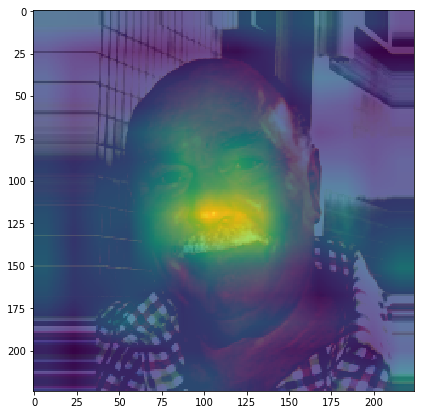

In [0]:
num = 111
plt.figure(figsize=(10,7))
plt.imshow(Y[num, :, :, 0] ) 
plt.imshow(test_generator_new[0][0][num], cmap='jet', alpha=0.2, interpolation='nearest')
print(pred_scores_new[num])
print(int((num)/2)+12)

In [0]:
predict_age = []
for i in pred_scores:
    predict_age.append(i[0])

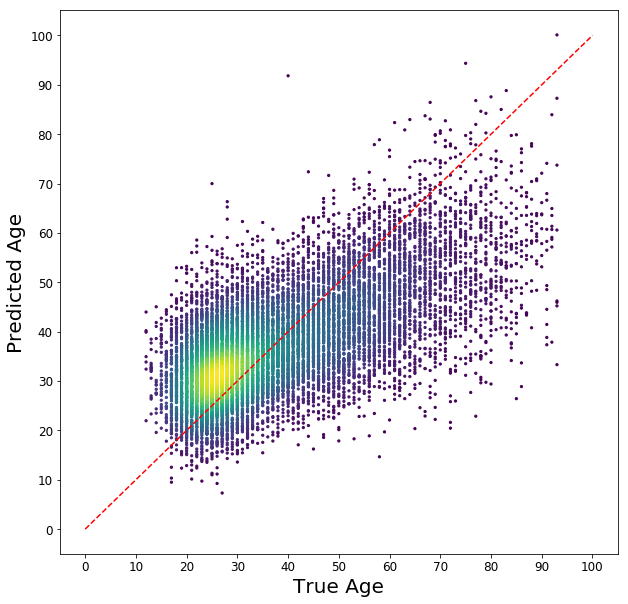

In [0]:
xy_line = (0,1)
xy = np.vstack([test_generator.classes, predict_age])
z = gaussian_kde(xy)(xy)
plt.figure(figsize=(10,10))
plt.scatter(test_generator.classes, predict_age, c=z, s=5)
plt.plot([0,100],[0,100], 'r--')
plt.xlabel('True Age',size=20)
plt.ylabel('Predicted Age',size=20)
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [0]:
r2 = metrics.r2_score(test_generator.classes, predict_age)

In [0]:
r2

0.41395610563903285

In [0]:
def create_confusion_matrix(size, true_class, predict_class):
    matrix = np.zeros((size,size))
    for i in range(0,len(true_class)):
        matrix[true_class[i],predict_class[i]] += 1
    return matrix        

In [0]:
matrix = create_confusion_matrix(101, test_generator.classes,predict_class)

"\nax.xaxis.set_ticklabels(Classes)\nax.yaxis.set_ticklabels(Classes)\nax.tick_params(axis='both', which='major', labelsize=15)\n"

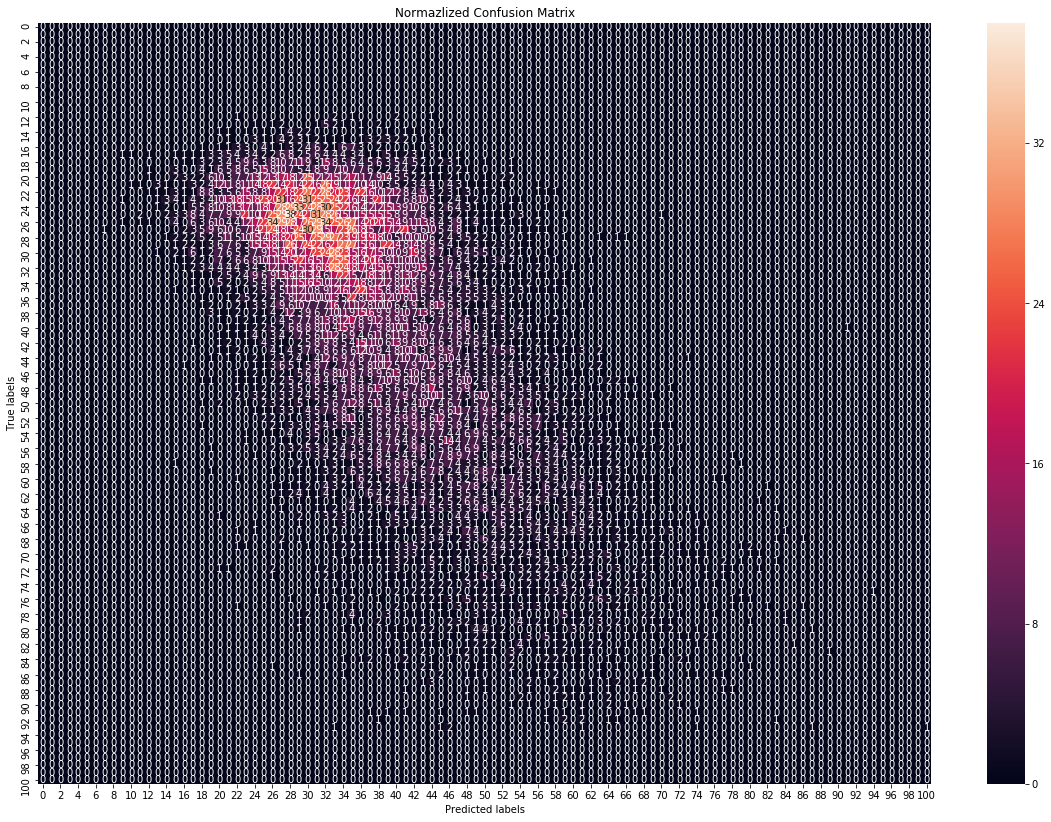

In [0]:
df = pd.DataFrame(matrix)
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(111)
sn.heatmap(df, annot=True, fmt = '0.3g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Normazlized Confusion Matrix')
"""
ax.xaxis.set_ticklabels(Classes)
ax.yaxis.set_ticklabels(Classes)
ax.tick_params(axis='both', which='major', labelsize=15)
"""